In [10]:
import pandas as pd

In [11]:
#importing identified aca posts
posts = pd.read_csv('../data/processed/aca_posts_2.csv')

posts.head()

,Unnamed: 0,Unnamed: 0.1,selftext,title,time_created,processed_text,processed_title
0,15,15,My sister-in-law in central Pennsylvania is lo...,Any Pennsylvania folks in here? Question about...,2021-02-15 19:47:49,sister-in-law central pennsylvania losing heal...,pennsylvania folks question gotchas exchange p...
1,21,21,It’s really important that I’m able to change ...,Cannot change plans on healthcare.gov even tho...,2021-02-15 15:33:18,it’s really important i’m able change plans pe...,cannot change plans even though special enroll...
2,35,35,My wife has the option to stay on COBRA throug...,Currently on COBRA after job loss. Will Market...,2021-02-14 07:24:09,wife option stay cobra september medical issue...,currently cobra job loss marketplace open enro...
3,93,99,Browsing ACA plans and I see that some are mar...,HSA with ACA plans,2021-02-10 18:34:40,"browsing aca plans see marked ""eligible health...",hsa aca plans
4,108,117,"Hi,\n\nIn December I signed up for a new insur...",Can I change plans during the upcoming open en...,2021-02-08 22:42:37,hi december signed new insurance provider morn...,change plans upcoming open enrollment extension


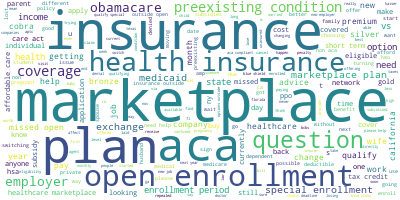

In [12]:
#now doing it for post titles
from wordcloud import WordCloud

#Join the different posts together.
long_string = ','.join(list(posts['processed_title'].values))

#Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

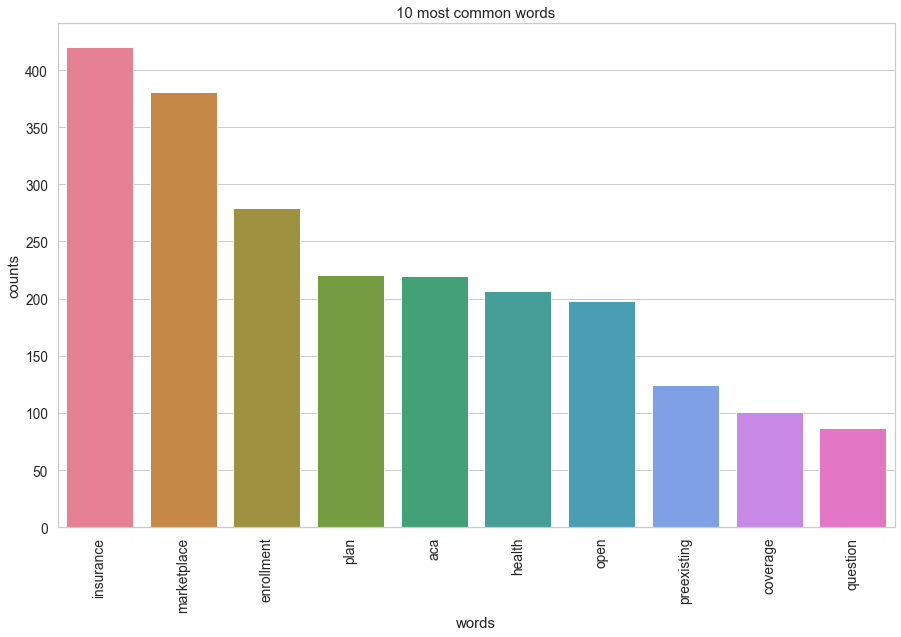

In [14]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(posts['processed_title'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [16]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [18]:
number_words = 15

#topics = [5, 10, 20, 50, 100, 250]

topics = [10, 15, 20, 25, 35, 50]

for topic in topics:
    # Create and fit the LDA mode;
    print('With {} number of topics'.format(str(topic)))
    lda = LDA(n_components = topic, n_jobs=-1)
    lda.fit(count_data)
    
    # Print the topics found by the LDA model
    print("Topics found via LDA:")
    print_topics(lda, count_vectorizer, number_words)
    print('******************************************************************************************************************************')

With 5 number of topics
Topics found via LDA:

Topic #0:
preexisting condition conditions coverage aca question 1095 marketplace plans help 2018 26 pregnancy obamacare considered need healthcare student income laid

Topic #1:
enrollment open insurance special coverage marketplace period plan health missed employer job new need aca california options qualify wife question

Topic #2:
insurance aca health marketplace exchange state plan individual ny ppo question blue outside income getting healthcare plans new buy employer

Topic #3:
marketplace plan insurance medicaid vs aca health premium healthcare silver help question employer bronze tax month pay year exchange kaiser

Topic #4:
insurance marketplace health aca obamacare care plans medicaid affordable short need term act help plan options vs question income advice
******************************************************************************************************************************
With 10 number of topics
Topics found via LDA